Графическое отделение корня уравнения

In [1]:
def f(x):
    return 10 ** x - 5 * x - 2

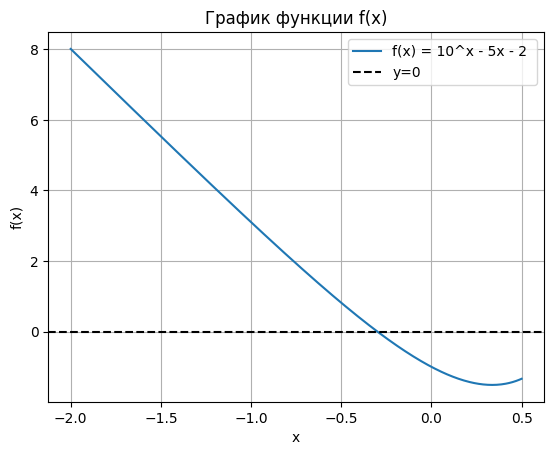

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-2, 0.5, 400)
y = f(x)

plt.plot(x, y, label='f(x) = 10^x - 5x - 2 ')
plt.axhline(0, color='black', linestyle='--', label='y=0')
plt.title('График функции f(x)')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid()
plt.show()

Метод дихотомии

In [3]:
def bisection_method(a, b, eps):
    if (f(a) * f(b) > 0):
        raise ValueError("f(a) and f(b) should have different sign")

    data = []
    k = 0
    while abs(b - a) > 2 * eps:
        m = (a + b) / 2.0

        data.append((k, a, b, f(a), f(b), b - a))
        k += 1
        if f(m) == 0:
            return m, data
        elif f(a) * f(m) < 0:
            b = m
        else:
            a = m

    data.append((k, a, b, f(a), f(b), b - a))
    return (a + b) / 2.0, k, data

Запустим метод дихотомии для нахождения корня с точностью ϵ = 10^-2.

In [4]:
a, b = -2, 0
eps = 0.01
root, iterations, data = bisection_method(a, b, eps)
print(f"Корень: {root}, Итерации: {iterations}")

Корень: -0.3046875, Итерации: 7


In [5]:
print("\nТаблица 1: Результаты работы метода дихотомии")
print(f"{'k':<5} {'a_k':<10} {'b_k':<10} {'f(a_k)':<10} {'f(b_k)':<12} {'b_k - a_k':<10}")
for row in data:
    print(f"{row[0]:<5} {row[1]:<10.5f} {row[2]:<10.5f} {row[3]:<10.5f} {row[4]:<12.5f} {row[5]:<10.5f}")



Таблица 1: Результаты работы метода дихотомии
k     a_k        b_k        f(a_k)     f(b_k)       b_k - a_k 
0     -2.00000   0.00000    8.01000    -1.00000     2.00000   
1     -1.00000   0.00000    3.10000    -1.00000     1.00000   
2     -0.50000   0.00000    0.81623    -1.00000     0.50000   
3     -0.50000   -0.25000   0.81623    -0.18766     0.25000   
4     -0.37500   -0.25000   0.29670    -0.18766     0.12500   
5     -0.31250   -0.25000   0.04947    -0.18766     0.06250   
6     -0.31250   -0.28125   0.04947    -0.07045     0.03125   
7     -0.31250   -0.29688   0.04947    -0.01082     0.01562   


Заведем функцию производной

In [6]:
def df(x):
    return np.log(10) * 10 ** x - 5

In [7]:
res = []

Метода Ньютона с постоянной производной

In [8]:
def newton_method_constant_derivative(x0, eps):
    xk = x0
    mu = df(x0)
    if mu == 0:
        raise ValueError("Производная равна нулю в начальной точке")
    k = 0

    while True:
        
        xk1 = xk - f(xk) / mu
        k += 1

        
        res.append((k, xk, abs(xk1 - xk)))

       
        if abs(xk1 - xk) < eps:
            return xk1, k

       
        xk = xk1

In [9]:
x0 = -1
epsilon = 1e-7

root, iterations = newton_method_constant_derivative(x0, epsilon)
print(f"Метода Ньютона с постоянной производной: Корень: {root}, Итерации: {iterations}")

Метода Ньютона с постоянной производной: Корень: -0.2996912896881474, Итерации: 10


Метод Ньютона

In [10]:
def newton_method(x0, eps):
    xk = x0
    k = 0

    while True:
        xk1 = xk - f(xk) / df(xk)
        k += 1

        res.append((k, xk, abs(xk1 - xk)))

        if xk1 < -1:
            raise ValueError("x is less then -1")

        if abs(xk1 - xk) < eps:
            return xk1, k

        xk = xk1

In [11]:
x0 = -1
epsilon = 1e-7

root_newton, iterations_newton = newton_method(x0, epsilon)
print(f"Метод Ньютона: Корень = {root_newton}, Итерации = {iterations_newton}")

Метод Ньютона: Корень = -0.29969127186757155, Итерации = 5


Метод секущих

In [12]:
def secant_method(x0, x1, eps):
    xk = x0
    xk1 = x1
    k = 0

    while True:
        if f(xk1) - f(xk) == 0:
            raise ValueError("Деление на ноль при методе секущих")

        xk2 = xk1 - f(xk1) * (xk1 - xk) / (f(xk1) - f(xk))
        k += 1
        res.append((k, xk1, abs(xk2 - xk1)))

        if abs(xk2 - xk1) < eps:
            return xk2, k, data

        xk, xk1 = xk1, xk2


In [13]:
x0 = -1
x1 = -0.5

root_secant, iterations_secant, data = secant_method(x0, x1, epsilon)
print(f"Метод секущих: Корень = {root_secant}, Итерации = {iterations_secant}")

Метод секущих: Корень = -0.2996912718675822, Итерации = 5


In [14]:
print(f"{' ':<5} {'М Н с постоянной производной ':<10} {'Метод Ньютона':<28} {'Метод секущих':<10}")
print(f"{'k':<5} {'x_k':<10} {'|x_k - x_{k-1}|':<18} {'x_k':<10} {'|x_k - x_{k-1}|':<17} {'x_k':<10} {'|x_k - x_{k-1}|':<10}")
for i in range(4):
    print(f"{res[i][0]:<5} {res[i][1]:<10.6f} {res[i][2]:<18.7f} {res[i + 10][1]:<10.6f} {res[i + 10][2]:<17.7f} {res[i + 15][1]:<10.6f} {res[i + 15][2]:<10.7f}")



for i in range(6, 10):
    print(f"{res[i][0]:<5} {res[i][1]:<10.6f} {res[i][2]:<18.7f}")

      М Н с постоянной производной  Метод Ньютона                Метод секущих
k     x_k        |x_k - x_{k-1}|    x_k        |x_k - x_{k-1}|   x_k        |x_k - x_{k-1}|
1     -1.000000  0.6499304          -1.000000  0.6499304         -0.500000  0.1787017 
2     -0.350070  0.0412936          -0.350070  0.0495916         -0.321298  0.0204169 
3     -0.308776  0.0073465          -0.300478  0.0007865         -0.300881  0.0011815 
4     -0.301429  0.0014021          -0.299691  0.0000002         -0.299700  0.0000087 
7     -0.299704  0.0000102         
8     -0.299694  0.0000020         
9     -0.299692  0.0000004         
10    -0.299691  0.0000001         
